# Klasifikasi Kualitas Kopi

Step by setp membuat machine learning multiclass classification untuk memprediksi kualitas kopi termasuk kategori **Baik, Sedang atau Buruk** berdasarkan fiur **Kadar kafein, Tingkat keasaman, dan Jenis proses**

Kita akan menggunakan :
- **StandarScalaer** untuk menyamakan rentang angka
- **OneHotEncoder** untuk memgubah tulisan menjadi angka
- **Pipeline** dan **ColumnTransformer** untuk  merangkai beberapa step sekaligus

In [9]:
import pandas as pd
df = pd.read_csv("dataset_kualitas_kopi.csv")
df

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk
...,...,...,...,...
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk


In [7]:
df.shape

(300, 4)

In [10]:
df.columns

Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')

In [11]:
df.dtypes

Kadar Kafein        float64
Tingkat Keasaman    float64
Jenis Proses         object
Kualitas Kopi        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kadar Kafein      300 non-null    float64
 1   Tingkat Keasaman  300 non-null    float64
 2   Jenis Proses      300 non-null    object 
 3   Kualitas Kopi     300 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [14]:
df.describe()
#menampilkan data statistik pada dataframe

,Kadar Kafein,Tingkat Keasaman
count,300.000000,300.000000
mean,94.880478,5.255010
std,18.612343,0.423348
min,60.340609,4.505419
25%,80.885090,4.912739
50%,96.469407,5.249464
75%,108.570401,5.622462
max,129.569514,5.995027


In [15]:
df.head()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk


In [16]:
df.tail()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk
299,98.192872,5.504599,Washed,Sedang


In [19]:
df["Jenis Proses"].value_counts()

Jenis Proses
Natural    103
Honey      101
Washed      96
Name: count, dtype: int64

In [20]:
df["Kualitas Kopi"].value_counts()

Kualitas Kopi
Baik      103
Buruk      99
Sedang     98
Name: count, dtype: int64

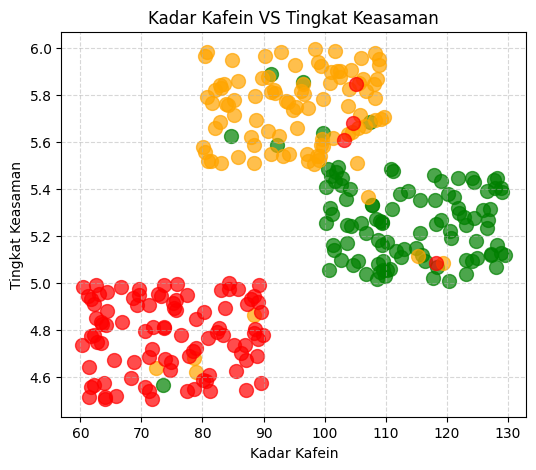

In [48]:
# membuat visualisasi menggunakan matplotlib

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

baik = df[df["Kualitas Kopi"]=="Baik"]
sedang = df[df["Kualitas Kopi"]=="Sedang"]
buruk = df[df["Kualitas Kopi"]=="Buruk"]

plt.figure(figsize=(6,5))

plt.scatter(baik["Kadar Kafein"], baik["Tingkat Keasaman"], s=100, color="green", alpha=0.7, label="Baik")
plt.scatter(sedang["Kadar Kafein"], sedang["Tingkat Keasaman"], s=100, color="orange", alpha=0.7, label="Sedang")
plt.scatter(buruk["Kadar Kafein"], buruk["Tingkat Keasaman"], s=100, color="red", alpha=0.7, label="Buruk")

plt.xlabel("Kadar Kafein")
plt.ylabel("Tingkat Keasaman")
plt.title("Kadar Kafein VS Tingkat Keasaman")
plt.legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df[["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"]]
y = df["Kualitas Kopi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]

preprocessing = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numeric_columns),
    ("oneshot", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
])



In [50]:
model = Pipeline(steps=[
    ("proprocessing", preprocessing),
    ("model", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9666666666666667


In [55]:
data_baru = pd.DataFrame([[90, 5, "Honey"]], columns=["Kadar Kafein","Tingkat Keasaman","Jenis Proses"])

prediksi = model.predict(data_baru)[0]

presentase = max(model.predict_proba(data_baru)[0])

print(f"Model memprediksi (prediksi) dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi (prediksi) dengan tingkat keyakinan 72.66%
